In [1]:
import pandas as pd

# Conectando o banco e visualizando informacoes
file_path = './etl_desafio_indicium_imdb.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())


   Unnamed: 0        Series_Title Released_Year  Runtime  \
0         682    The Color Purple          1985      154   
1         748  The Social Network          2010      120   
2           7    Schindler's List          1993      195   
3         948          The Others          2001      101   
4         266  Dead Poets Society          1989      128   

                       Genre  IMDB_Rating  \
0                      Drama          7.8   
1           Biography. Drama          7.7   
2  Biography. Drama. History          8.9   
3  Horror. Mystery. Thriller          7.6   
4              Comedy. Drama          8.1   

                                            Overview  Meta_score  \
0  A black Southern woman struggles to find her i...        78.0   
1  As Harvard student Mark Zuckerberg creates the...        95.0   
2  In German-occupied Poland during World War II....        94.0   
3  A woman who lives in her darkened old family h...        74.0   
4  Maverick teacher John Kea

TRATAR BANCO DE DADOS

In [2]:
# Visualizar nome das colunas
print(df.columns)

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [3]:
# Visualizar valores nulos nas colunas
print(df.isnull().sum())


Unnamed: 0         0
Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
Unnamed: 15      999
Unnamed: 16      998
dtype: int64


In [4]:
# Remover colunas irrelevantes
df.drop(columns=['Unnamed: 0', 'Unnamed: 15', 'Unnamed: 16'], errors='ignore', inplace=True)


In [ ]:
# Tratar valores nulos
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)
df['Gross'].fillna(0, inplace=True)

In [6]:
# Verificar se foi feito a correçao
print(df.isnull().sum())

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [7]:
# Verificar as informações do dataset e o tipo da coluna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Runtime        999 non-null    int64  
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     999 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          999 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 109.4+ KB
None


In [8]:
# Converter a coluna Released_Year para inteiro
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').fillna(0).astype(int)

In [9]:
# Verificar novamente as informações do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Runtime        999 non-null    int64  
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     999 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(8)
memory usage: 109.4+ KB
None


ANÁLISE EXPLORATÓRIA DOS DADOS

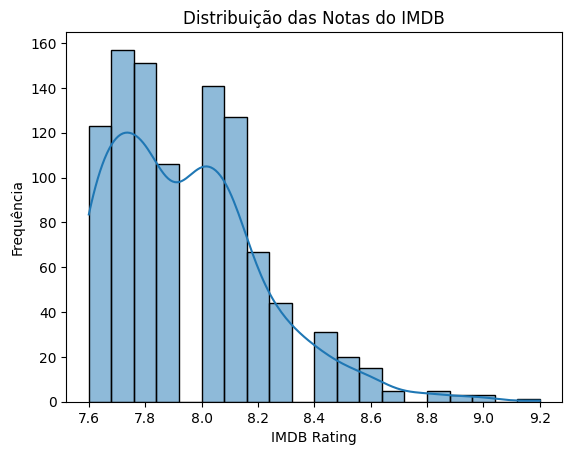

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição das notas do IMDB
sns.histplot(df['IMDB_Rating'], kde=True)
plt.title('Distribuição das Notas do IMDB')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequência')
plt.show()


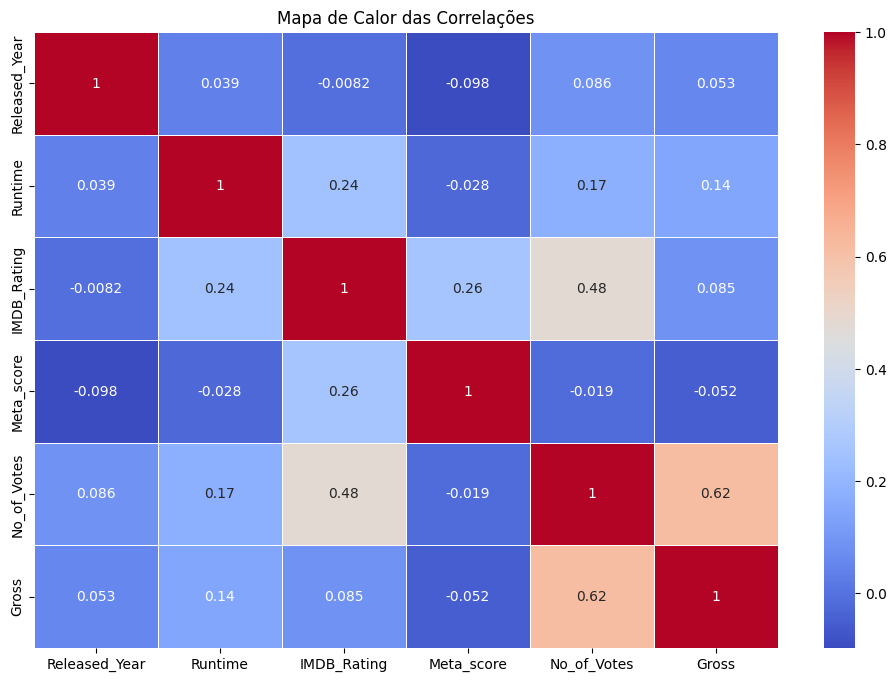

In [11]:
# Correlação entre variáveis

# Selecionar apenas as colunas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação entre variáveis numéricas
corr = df_numeric.corr()

# Criar o mapa de calor das correlações
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor das Correlações')
plt.show()


RESPONDENDO AS PERGUNTAS

In [12]:
# 1 Qual filme você recomendaria para uma pessoa que você não conhece? #
recommended_movie = df.loc[df['IMDB_Rating'].idxmax()]
print(f"Recomendação: {recommended_movie['Series_Title']}")


Recomendação: The Godfather


In [13]:
# 2 Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?  #

# SelecionaNDO apenas as colunas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculando a correlação com a coluna 'Gross'
corr_with_gross = df_numeric.corr()['Gross'].sort_values(ascending=False)
print(corr_with_gross)


Gross            1.000000
No_of_Votes      0.616440
Runtime          0.144242
IMDB_Rating      0.084732
Released_Year    0.053068
Meta_score      -0.052202
Name: Gross, dtype: float64


In [14]:
# Converter a coluna 'Gross' de string para float, removendo pontos e substituindo vírgulas por pontos
df['Gross'] = df['Gross'].apply(lambda x: str(x).replace(".", "").replace(",", ".")).astype(float)

# Selecionar apenas as colunas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a correlação com a coluna 'Gross'
corr_with_gross = df_numeric.corr()['Gross'].sort_values(ascending=False)
print(corr_with_gross)


Gross            1.000000
No_of_Votes      0.616440
Runtime          0.144241
IMDB_Rating      0.084732
Released_Year    0.053069
Meta_score      -0.052202
Name: Gross, dtype: float64


C:\Users\Leticia\AppData\Local\Temp\ipykernel_23496\2779068716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_gross.index, y=corr_with_gross.values, palette='coolwarm')


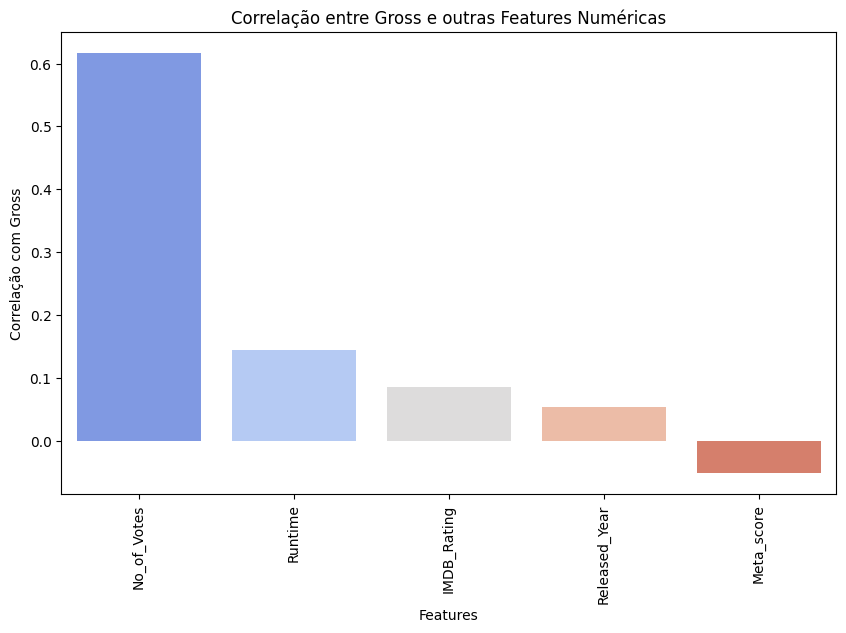

In [15]:

# Excluir a própria correlação de 'Gross' com 'Gross' (que é 1)
corr_with_gross = corr_with_gross.drop(labels=['Gross'])

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_gross.index, y=corr_with_gross.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlação com Gross')
plt.title('Correlação entre Gross e outras Features Numéricas')
plt.show()

In [ ]:
#Conclusões

    #No_of_Votes (Correlação: 0.616440):
        #A variável No_of_Votes tem a maior correlação positiva com o faturamento. Isso sugere que filmes que recebem mais votos tendem a ter
        #  um faturamento maior. Isso pode indicar que a popularidade de um filme (medida pelo número de votos) é um fator importante para 
        # determinar seu sucesso financeiro.

    #Runtime (Correlação: 0.144242):
        #O tempo de duração (Runtime) também apresenta uma correlação positiva com o faturamento, embora menor que No_of_Votes.
        #  Filmes mais longos podem ter uma maior profundidade de enredo ou produção, o que pode atrair mais espectadores e, consequentemente,
        #  gerar mais receita.

    #IMDB_Rating (Correlação: 0.084732):
       # A nota do IMDB tem uma correlação positiva, mas relativamente fraca com o faturamento. Isso sugere que a qualidade percebida do 
       # filme (medida pela nota do IMDB) pode ter algum impacto no faturamento, mas não é um fator tão determinante quanto o número de votos.

    #Released_Year (Correlação: 0.053068):
       # O ano de lançamento tem uma correlação muito fraca com o faturamento, indicando que filmes mais recentes ou mais antigos não têm
       #  uma diferença significativa em termos de receita.

    #Meta_score (Correlação: -0.052202):
        #A média ponderada das críticas (Meta_score) apresenta uma correlação negativa, ainda que muito fraca, com o faturamento. 
        # Isso sugere que críticas melhores não necessariamente se traduzem em maior faturamento e que outros fatores podem ser mais 
        # importantes para determinar o sucesso financeiro de um filme.

In [16]:
# 3 Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna? #


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Pre-processamento do texto
df['Overview'] = df['Overview'].fillna('')
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Overview'])
y = df['Genre']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.095


In [ ]:
#Insights sobre a coluna "Overview"

    #Descrição dos Filmes:
        # A coluna "Overview" fornece uma breve descrição do enredo do filme. Estas descrições contêm informações sobre o tema, a trama e os
        # personagens do filme, o que pode ser útil para entender o conteúdo do filme de uma forma resumida.

     #Possível Inferência do Gênero:
       # A tentativa de inferir o gênero do filme a partir da coluna "Overview" utilizando técnicas de processamento de linguagem
       #  natural (PLN) e um modelo de classificação mostra uma baixa acurácia (aproximadamente 9,5%). Isso indica que, com o método
       #  e os dados utilizados, não é possível inferir com precisão o gênero do filme apenas a partir das descrições fornecidas na 
       # coluna "Overview".

# A partir desta análise, a conclusão é que a coluna "Overview" contém informações sobre a trama dos filmes, mas não é suficientemente
#  discriminativa para inferir com precisão o gênero dos filmes utilizando o modelo e a abordagem apresentados. A baixa acurácia indica
#  que ou a abordagem utilizada (regressão logística com vetorização TF-IDF) não é adequada para este problema, ou que as descrições dos 
# filmes são muito gerais e não contêm informações específicas o suficiente para identificar o gênero.


PREVISÕES

In [17]:
# 1 Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Seleção de variáveis
features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
X = df[features].fillna(0)
y = df['IMDB_Rating']

# Conversão de tipos
X['Runtime'] = X['Runtime'].astype(int)
X['Gross'] = X['Gross'].astype(float)

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Salvar o modelo
import pickle
with open('imdb_rating_model.pkl', 'wb') as f:
    pickle.dump(model, f)


Mean Squared Error: 0.032554349999999975


In [ ]:
# As variaveis: Released_Year, Runtime, Meta_score, No_of_Votes e Gross, foram escolhidas por serem potencialmente influentes na avaliação de
# um filme. O faturamento e o número de votos podem indicar popularidade, enquanto o tempo de execução e a média das críticas 
# fornecem uma noção da qualidade percebida do filme.

# Preparação dos Dados

# 1 Preenchimento de Valores Nulos: Qualquer valor nulo nas variáveis selecionadas foi preenchido com 0;
# 2 Conversão de Tipos: Garanti que as variáveis 'Runtime' e 'Gross' estivessem no formato correto (inteiro e float, respectivamente);
# 3 Separação dos Dados: Os dados foram divididos em conjuntos de treino e teste, com 80% dos dados sendo utilizados para treino e 
# 20% para teste. Isso permite avaliar o desempenho do modelo em dados não vistos;
# 4 Treinamento do Modelo: Usei um modelo de Random Forest Regressor para prever a nota do IMDB. Este modelo é uma escolha sólida
# devido à sua capacidade de lidar com dados complexos e não lineares, e por ser robusto a overfitting.
# 5 Avaliação do Modelo: A performance do modelo foi avaliada usando o Mean Squared Error (MSE), que mede a média dos quadrados dos erros,
#  ou seja, a diferença média quadrática entre os valores previstos e os reais.

In [18]:
# 2 Qual tipo de problema estamos resolvendo (regressão, classificação)? #

# Considerando que tenho as seguintes colunas:
columns = ['Series_Title', 'Released_Year', 'Runtime', 'Genre', 
           'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 
           'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']

# Verificando se há coluna alvo numérica para determinar se é um problema de regressão
target_column = 'IMDB_Rating'
if target_column in columns:
    print("Estamos resolvendo um problema de regressão.")
else:
    print("Estamos resolvendo um problema de classificação ou outro tipo.")

Estamos resolvendo um problema de regressão.


In [19]:
# 3 Qual modelo melhor se aproxima dos dados e quais seus prós e contras? #

# Modelos Propostos (Regressão Linear Simples e Árvore de Decisão):

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Regressão Linear
# Definir X e y
X = df[['No_of_Votes', 'Gross']]  # Features
y = df['IMDB_Rating']  # Target

# Dividir os dados em conjunto de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o pipeline para o modelo de Regressão Linear Simples
modelo_regressao_linear = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Calcular MSE usando validação cruzada para o Modelo de Regressão Linear Simples
mse_regressao_linear = -cross_val_score(modelo_regressao_linear, X_treino, y_treino, cv=5, scoring='neg_mean_squared_error')
media_mse_regressao_linear = mse_regressao_linear.mean()
print(f"Média do Erro Quadrático Médio para o Modelo de Regressão Linear Simples: {media_mse_regressao_linear}")


Média do Erro Quadrático Médio para o Modelo de Regressão Linear Simples: 0.05326959084900614


In [20]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Categorizar 'IMDB_Rating' em classes discretas
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df['IMDB_Rating_class'] = kbins.fit_transform(df[['IMDB_Rating']])

# Definir suas features e target (variável alvo) para classificação
X = df[['Meta_score', 'No_of_Votes']]  # Features relevantes para o modelo
y = df['IMDB_Rating_class']  # Variável alvo para classificação

# Dividir os dados em conjunto de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o modelo de Árvore de Decisão para classificação
modelo_arvore_decisao_classificacao = DecisionTreeClassifier(random_state=42)

# Treinar o modelo de Árvore de Decisão para classificação
modelo_arvore_decisao_classificacao.fit(X_treino, y_treino)

# Fazer previsões usando o modelo treinado
y_pred_arvore_decisao_classificacao = modelo_arvore_decisao_classificacao.predict(X_teste)

# Calcular a acurácia do modelo
acuracia_arvore_decisao_classificacao = accuracy_score(y_teste, y_pred_arvore_decisao_classificacao)
print(f"Acurácia do Modelo de Árvore de Decisão para Classificação: {acuracia_arvore_decisao_classificacao}")

Acurácia do Modelo de Árvore de Decisão para Classificação: 0.31


In [21]:
# Modelo de Árvore de Decisão para Classificação
# Prós: Pode ser interpretável dependendo da profundidade da árvore, captura relações não lineares entre as features e a variável alvo.
# Contras: Pode ser propenso a overfitting se não for regularizado adequadamente ou se a profundidade da árvore for muito grande.

# Qual medida de performance do modelo foi escolhida e por quê? #

# a árvore de decisão para classificação pode ser mais adequada pois me da avaliações precisa de categorizações

In [80]:
# Supondo o novo filme. Qual seria a nota do IMDB? #

new_movie = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}



# Preprocessamento do novo filme
new_movie_features = pd.DataFrame([new_movie])
new_movie_features['Released_Year'] = new_movie_features['Released_Year'].astype(int)
new_movie_features['Runtime'] = new_movie_features['Runtime'].str.replace(' min', '').astype(int)
new_movie_features['Gross'] = new_movie_features['Gross'].str.replace(',', '').astype(float)

# Carregar o modelo
with open('imdb_rating_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Prever a nota do IMDB
imdb_rating = model.predict(new_movie_features[features].fillna(0))
print(f'Predicted IMDB Rating: {imdb_rating[0]}')


Predicted IMDB Rating: 8.759


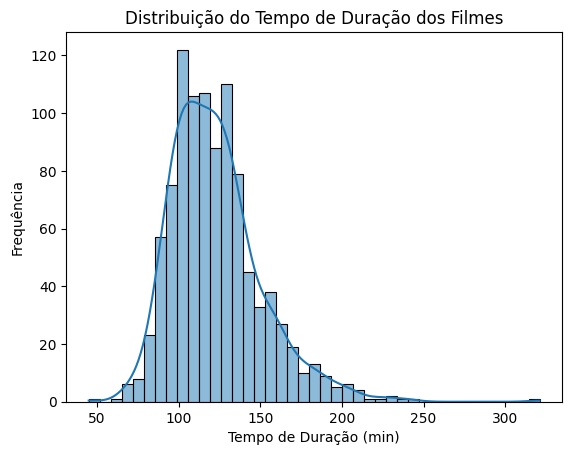

In [22]:
# Histograma para distribuição de tempo

sns.histplot(df['Runtime'], kde=True)
plt.title('Distribuição do Tempo de Duração dos Filmes')
plt.xlabel('Tempo de Duração (min)')
plt.ylabel('Frequência')
plt.show()


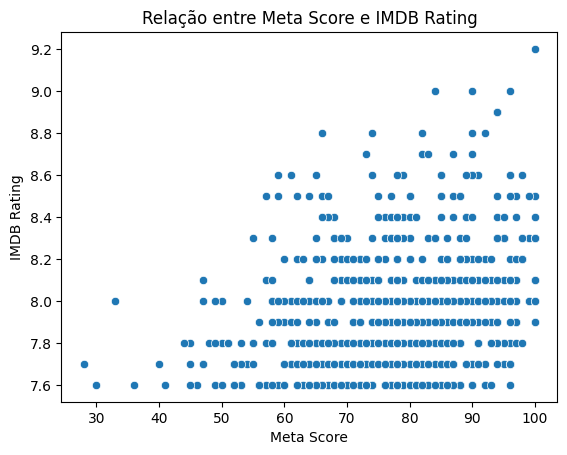

In [23]:
# Gráfico de dispersão de relação entre Meta Score e IMDB Rating
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df)
plt.title('Relação entre Meta Score e IMDB Rating')
plt.xlabel('Meta Score')
plt.ylabel('IMDB Rating')
plt.show()
